In [20]:
import pandas as pd
import numpy as np
import sklearn #scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
URL='https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true'
df=pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Datasetning har bir qatori bu bitta hudud (mahalla, kvartal, blok) haqida ma'lumot. Dataset 10 ta ustundan iborat:
- `longitude` va `latitude` birgalikda GPS koordinatalar
- `housing_median_age` - uylarning median yoshi
- `total_rooms` - ushbu hududda mavjud jami xonalar
- `total_bedrooms` - ushbu hududda mavjud jami yotoqxonalar
- `population` - hudud aholi soni
- `households` - hududdagi oilalar soni
- `median_income` - median daromad
- `median_house_values` - uylarning median narxi
- `ocean_proximity` - hududning okeanga qanchalik yaqinligi

### ❓ Median va o'rtacha qiymatlar o'rtasida farqni bilasizmi?

Deylik bizda 10 ta son bor, shu sonlarning o'rtachasini hisoblash uchun avval ularni qo'shamiz keyin esa yig'indini 10 ga bo'almiz.
Median hisoblash uchun esa sonlarni o'sish tartibida tahlaymiz va o'rtadagi sonni olamiz.

![Imgur](https://i.imgur.com/Qkzwv3u.png)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
df.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [24]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


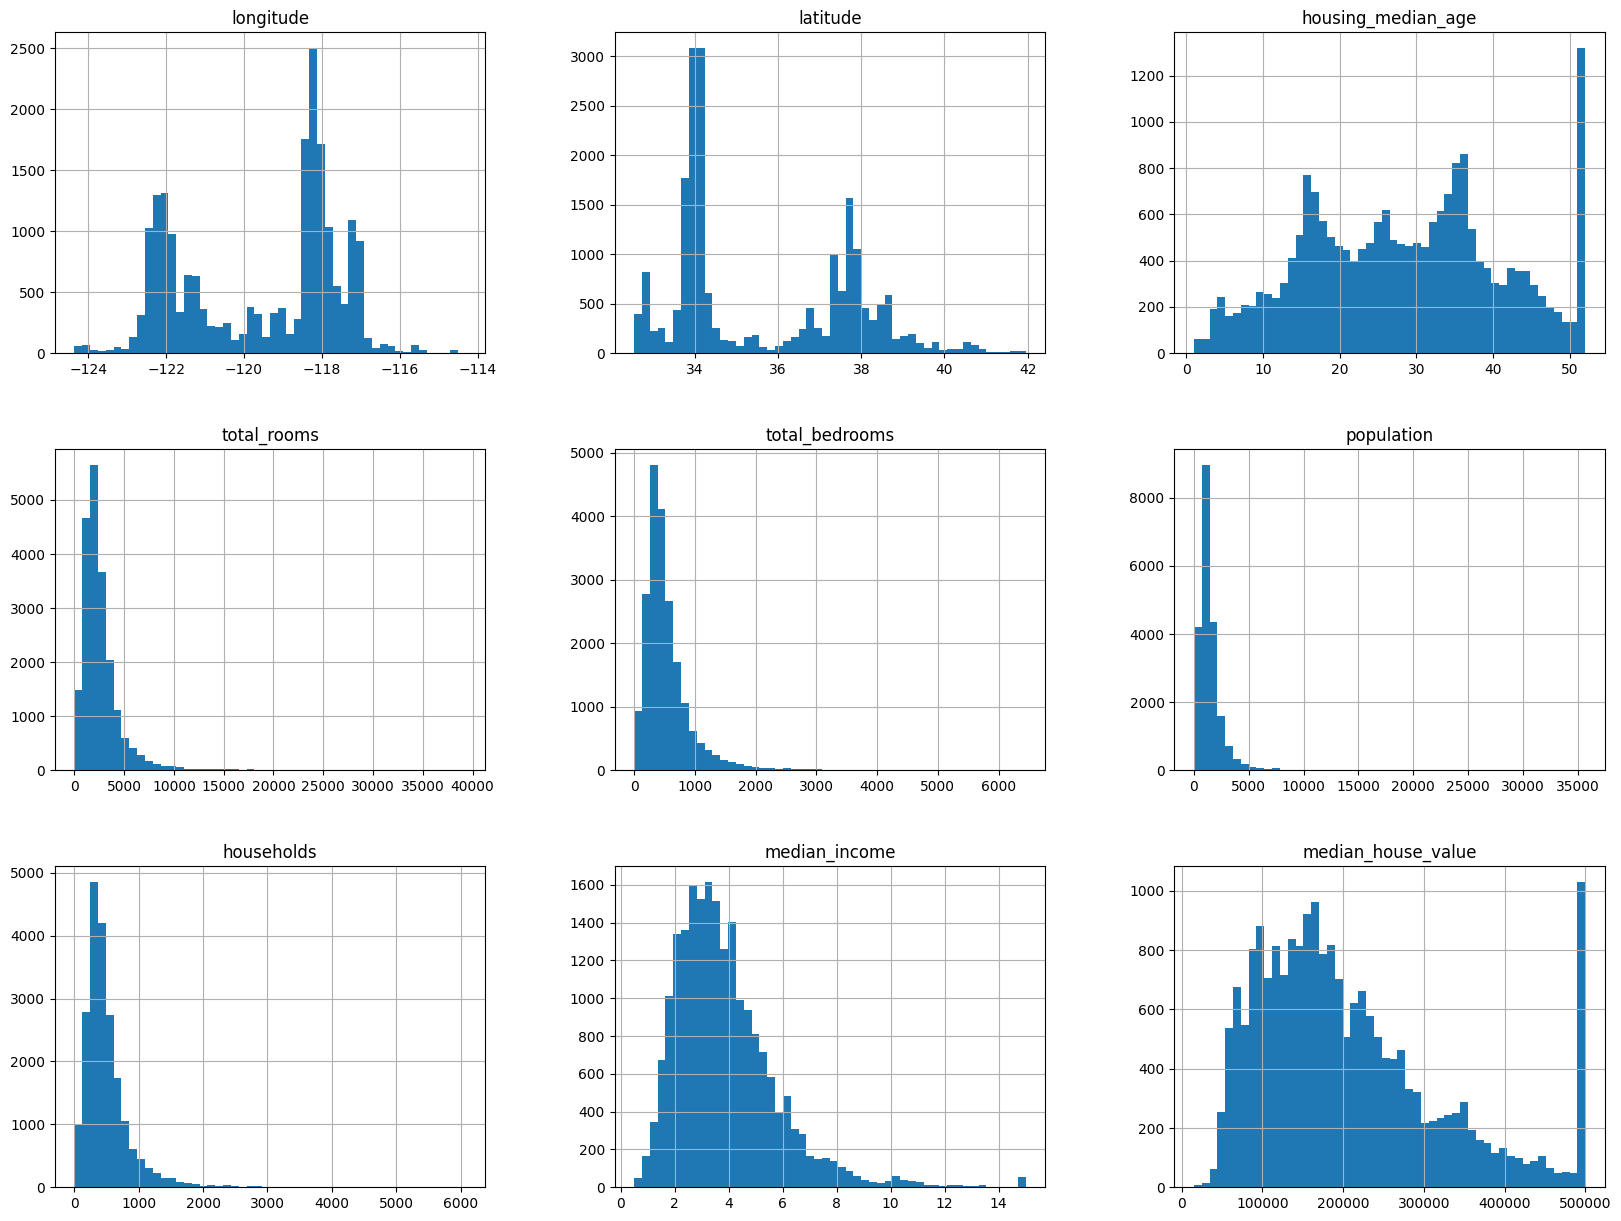

In [25]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [27]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [28]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


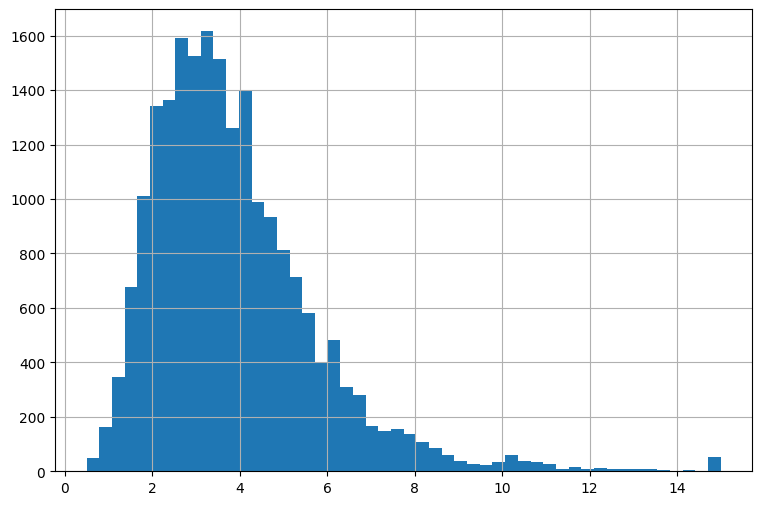

In [29]:
df['median_income'].hist(bins=50,figsize=(9,6))
plt.show()

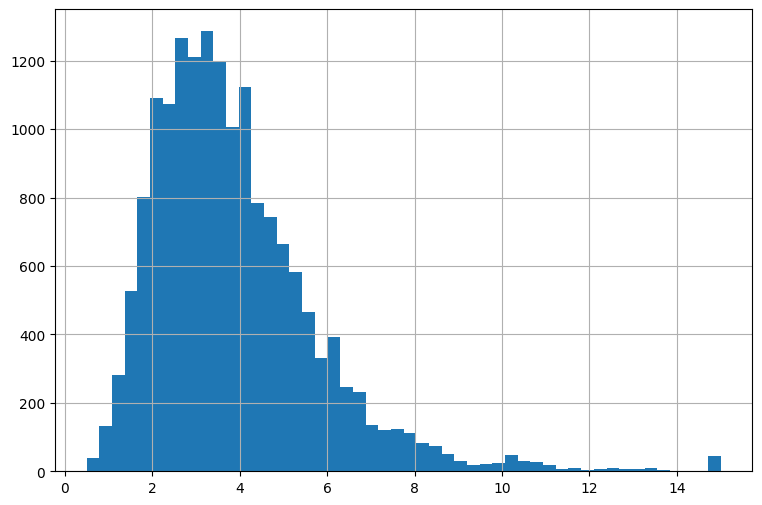

In [34]:
train_set['median_income'].hist(bins=50, figsize=(9,6))
plt.show()

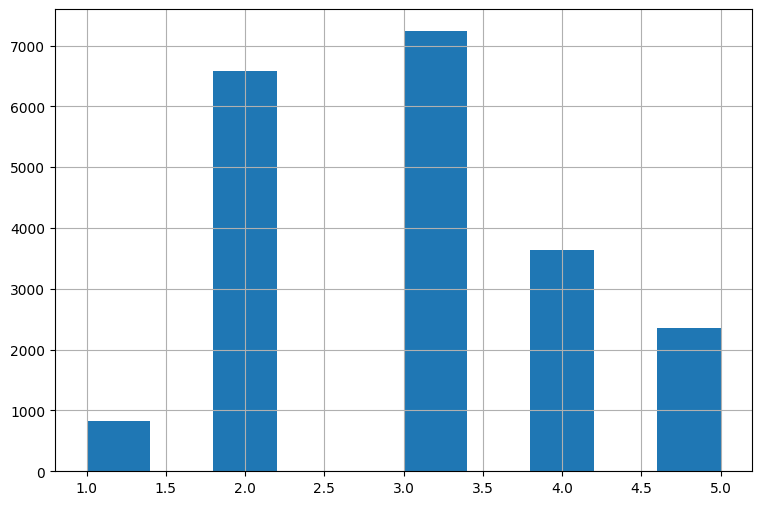

In [30]:
df['income_cat']=pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
stratied_split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index,test_index in stratied_split.split(df,df['income_cat']):
  strat_train_set=df.loc[train_index]
  strat_test_set=df.loc[test_index]

In [33]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [36]:
housing=strat_train_set.copy()

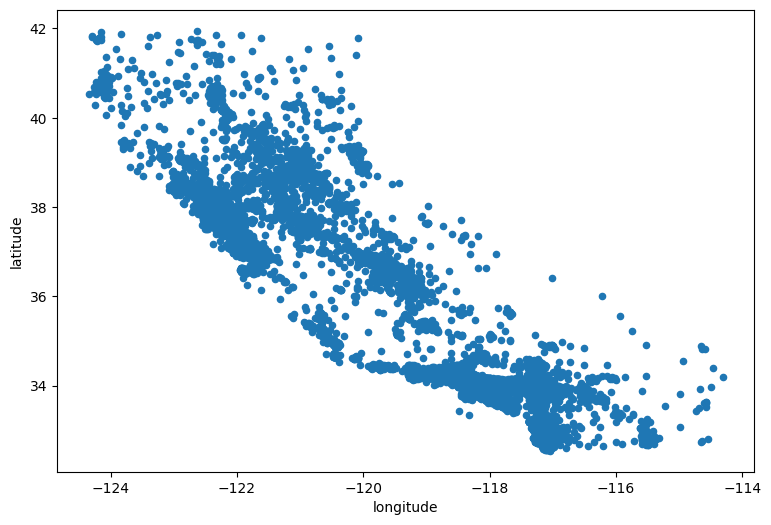

In [39]:
housing.plot(kind='scatter',x='longitude',y='latitude',figsize=(9,6))
plt.show()

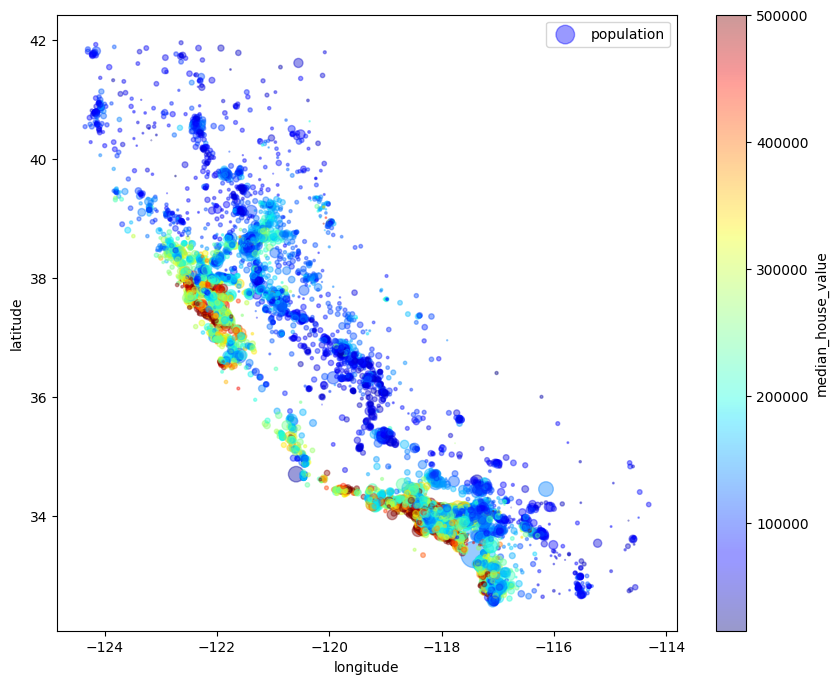

In [42]:
housing.plot(kind='scatter',
             s=housing['population']/100,
             alpha=0.4,
             label='population',
             c='median_house_value',
             cmap='jet',
             colorbar=True,
             x='longitude',
             y='latitude',
             figsize=(10,8))
plt.show()

In [44]:
numeric_df = housing.select_dtypes(include='number')
numeric_df.corrwith(numeric_df['median_house_value']).sort_values(ascending=False)

,0
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


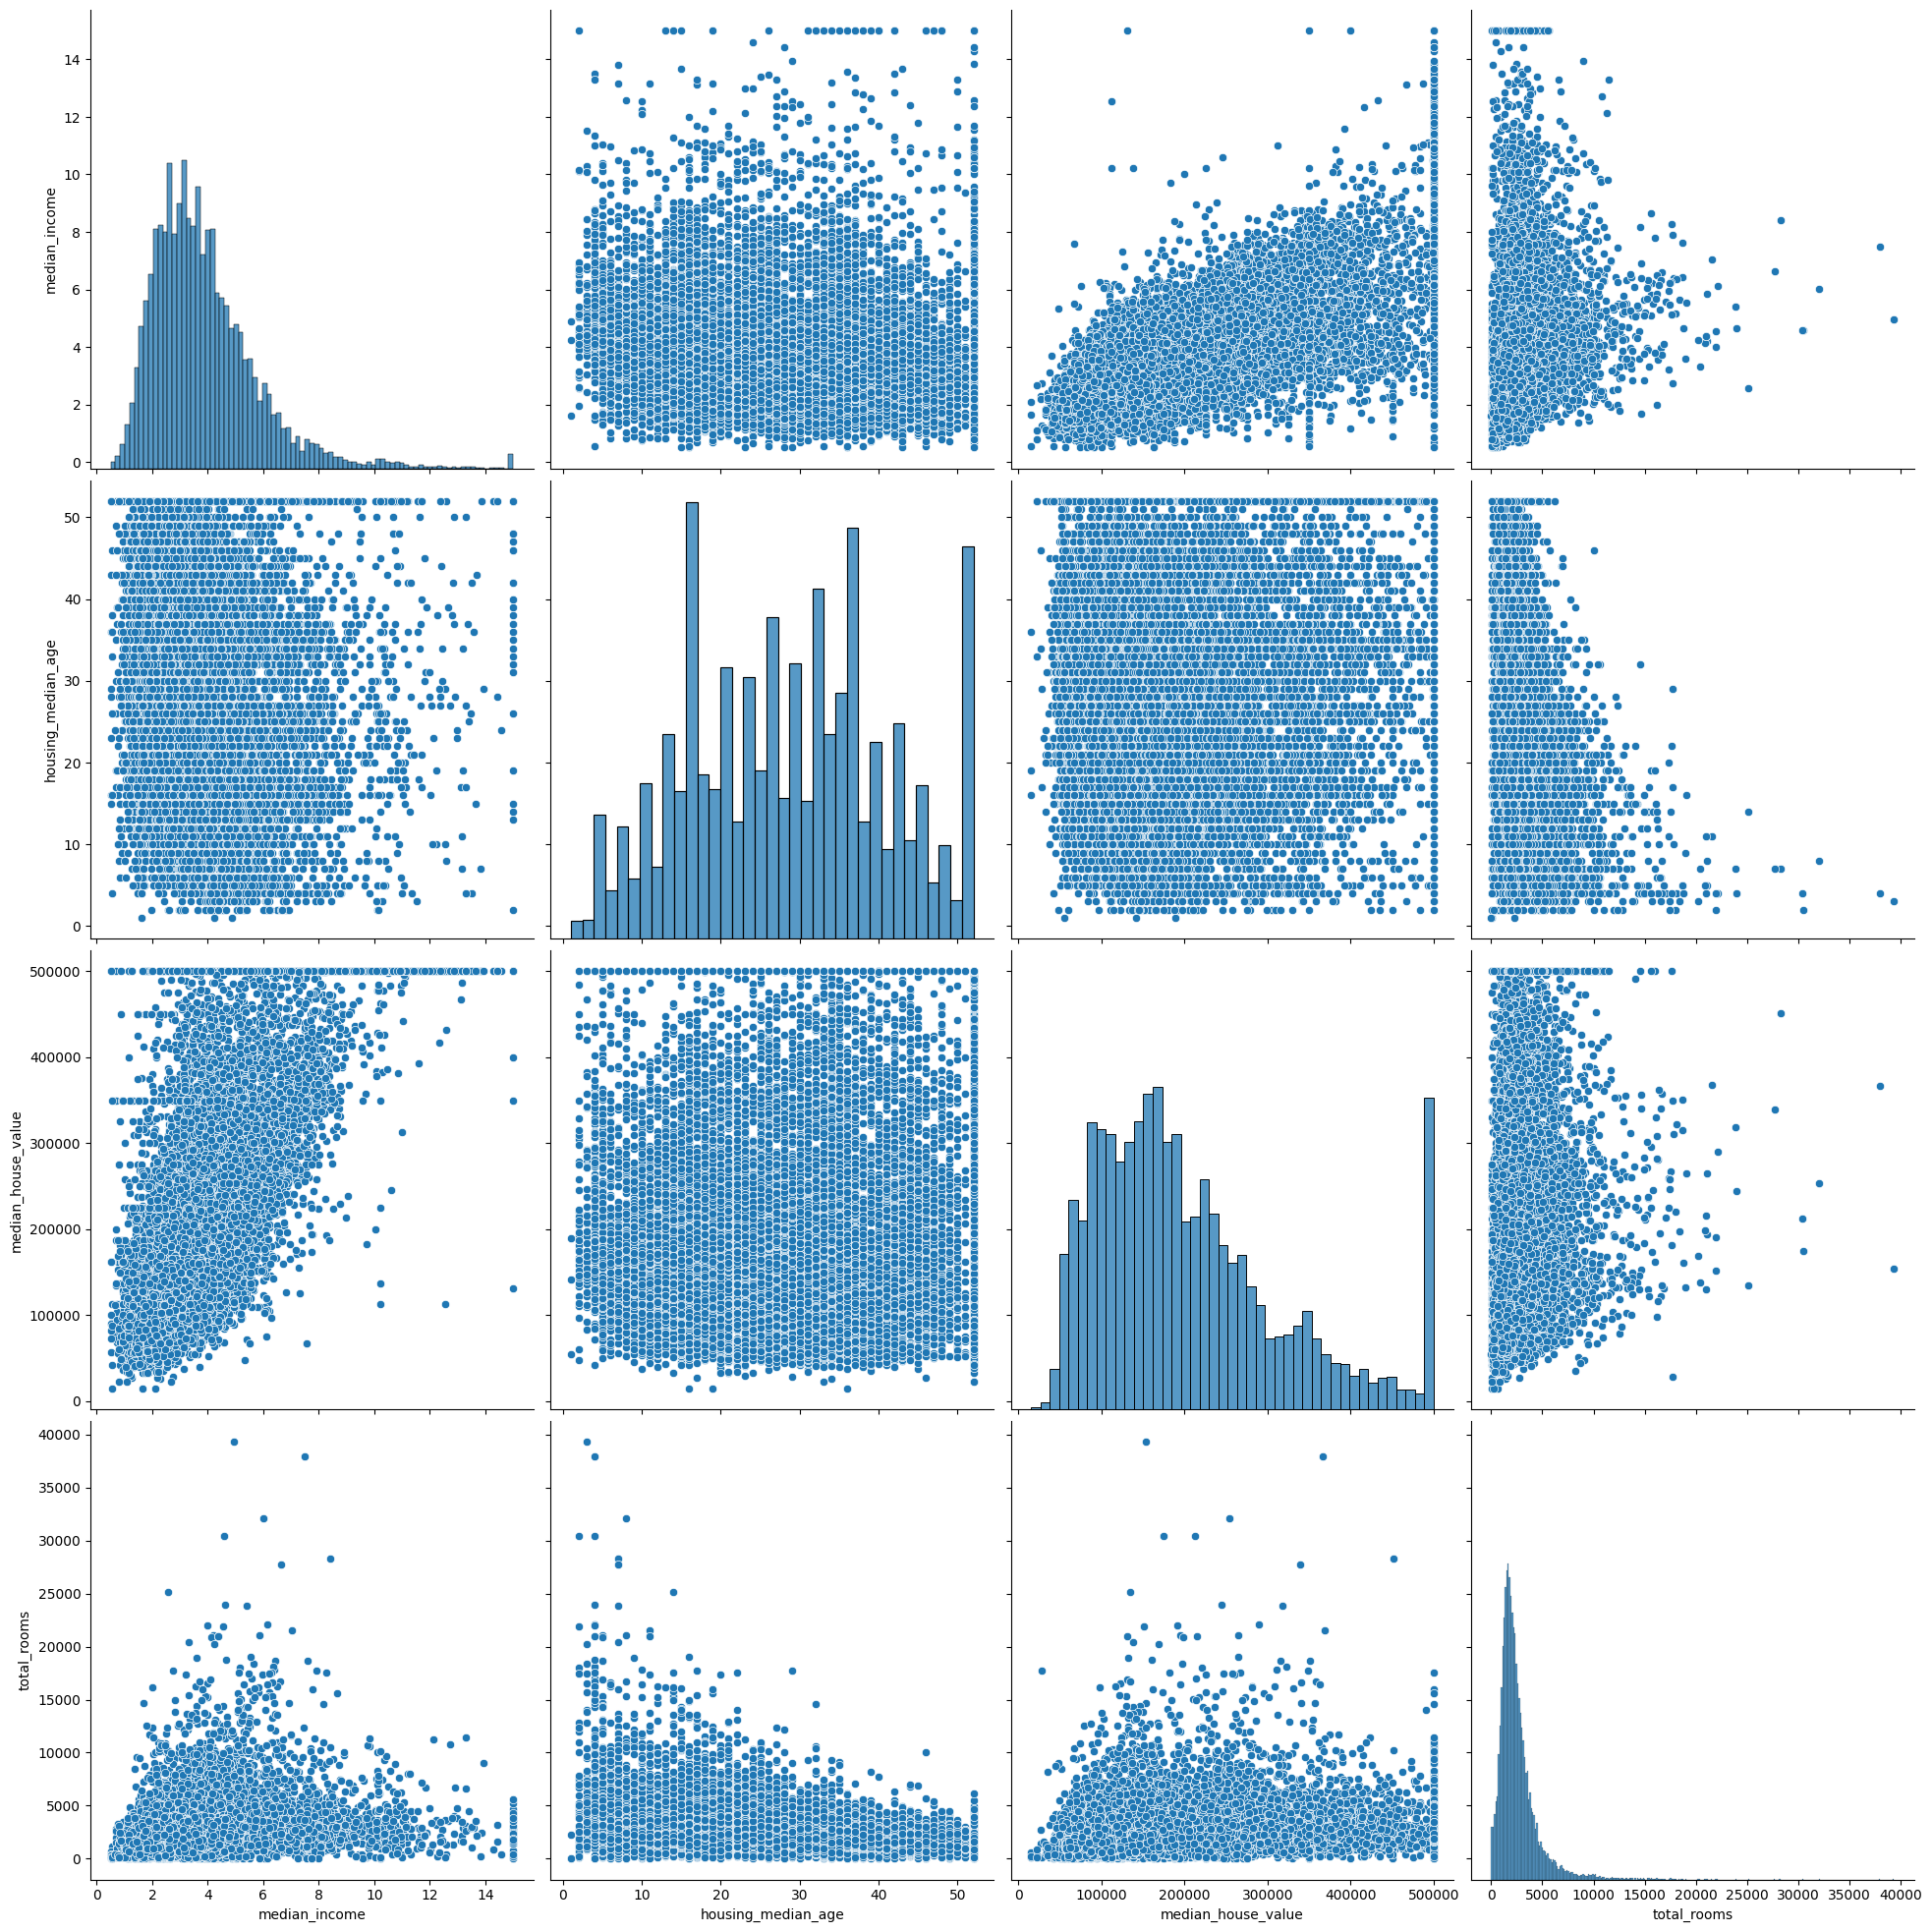

In [47]:
cols=['median_income','housing_median_age','median_house_value','total_rooms']
sns.pairplot(housing[cols],height=5)
plt.show()

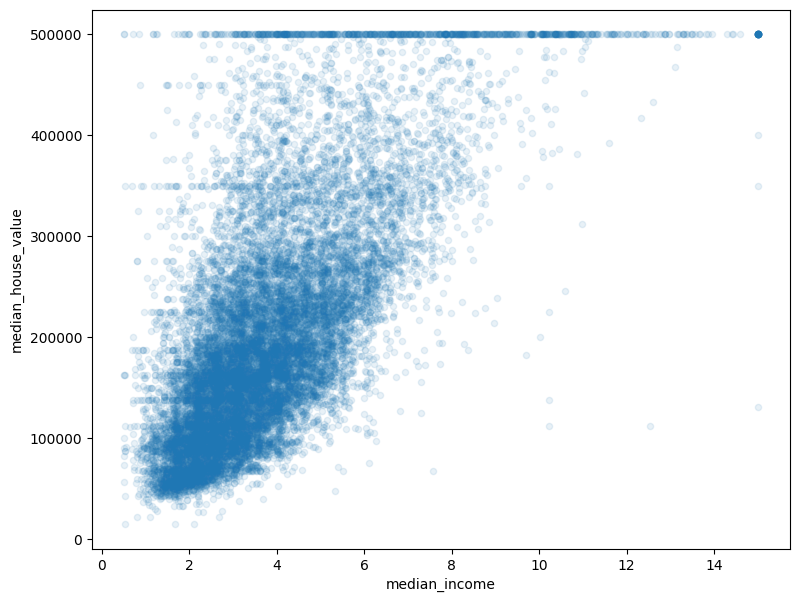

In [48]:
housing.plot(kind='scatter', x="median_income", y="median_house_value", alpha=0.1, figsize=(9,7))
plt.show()

In [49]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [50]:
housing.select_dtypes(include='number').corrwith(housing['median_house_value']).sort_values(ascending=False)

,0
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466
